In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import numpy as np

In [18]:
data=pd.read_csv("dataproject2022.csv", sep=';', index_col="ID",  thousands=',')
data= data.drop(['Pred_default (y_hat)', 'PD','Group'] , axis = 1)
train, test = train_test_split(data, test_size=0.2)



X_train = train.drop('Default (y)', axis=1)
y_train = train['Default (y)']
X_test = test.drop('Default (y)', axis=1)
y_test = test['Default (y)']

In [16]:
rf_tuned = RandomForestClassifier(criterion="gini", max_depth=10, max_features='auto', min_samples_leaf=5, min_samples_split=5, n_estimators=100)
rf_tuned.fit(X_train, y_train)
predictions_tuned = rf_tuned.predict(X_test)

print('Accuracy: %.3f' % accuracy_score(predictions_tuned, y_test))

Accuracy: 0.797


In [38]:
X_train.columns[:3]

Index(['Job tenure', 'Age', 'Car price'], dtype='object')

In [68]:
X_train.columns

Index(['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment',
       'Loan duration', 'Monthly payment', 'Credit event', 'Married',
       'Homeowner'],
      dtype='object')

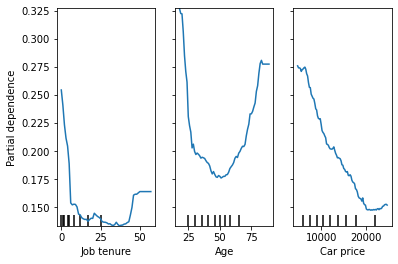

In [71]:
from sklearn.inspection import PartialDependenceDisplay


# for i in range(len(X_train.columns) - 1):
PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [0, 1, 2])

# disp2 = PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [0, 1], ax=disp1.axes_)

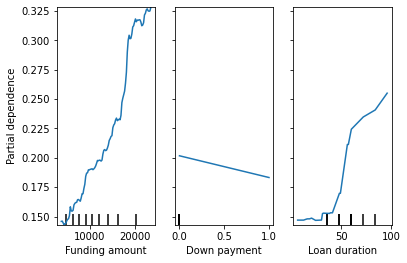

In [40]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train,X_train.columns[3:6])


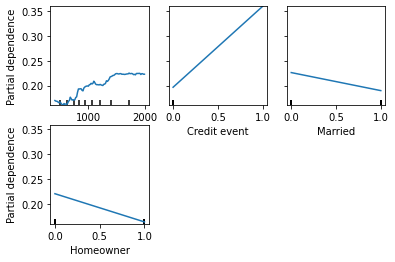

In [41]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train,X_train.columns[6:])


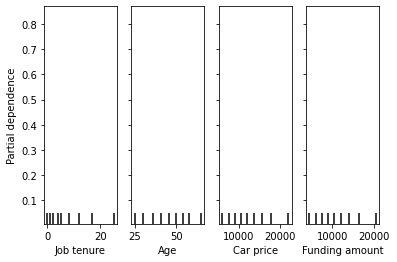

In [47]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train,X_train.columns[:4], kind="centered", n_cols=4)


In [50]:
from PyALE import ale


In [60]:
X_train.columns

Index(['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment',
       'Loan duration', 'Monthly payment', 'Credit event', 'Married',
       'Homeowner'],
      dtype='object')

PyALE._ALE_generic:INFO: Continuous feature detected.


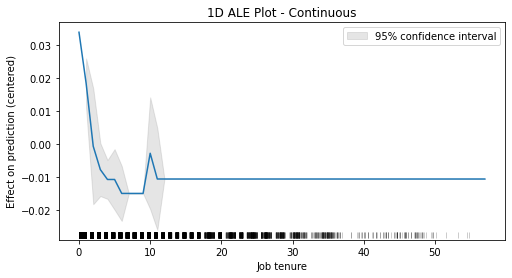

PyALE._ALE_generic:INFO: Continuous feature detected.


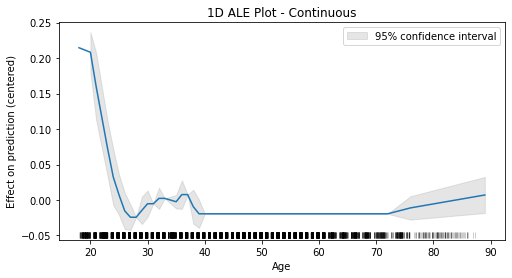

PyALE._ALE_generic:INFO: Continuous feature detected.


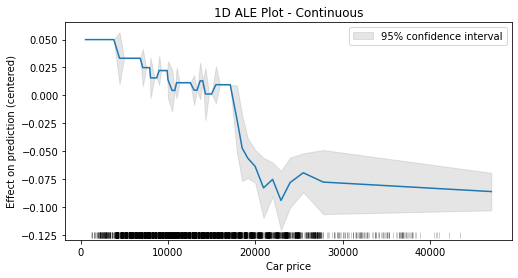

PyALE._ALE_generic:INFO: Continuous feature detected.


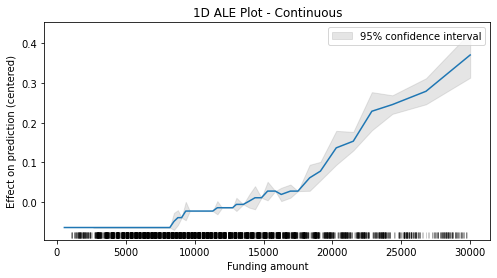

PyALE._ALE_generic:INFO: Discrete feature detected.


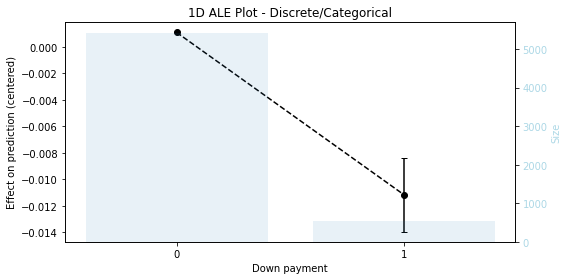

PyALE._ALE_generic:INFO: Continuous feature detected.


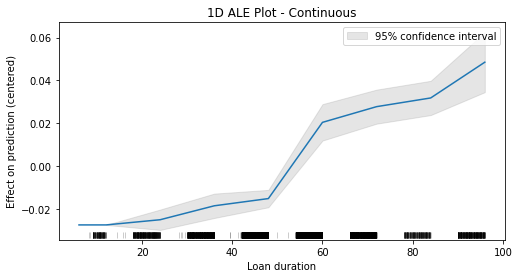

PyALE._ALE_generic:INFO: Continuous feature detected.


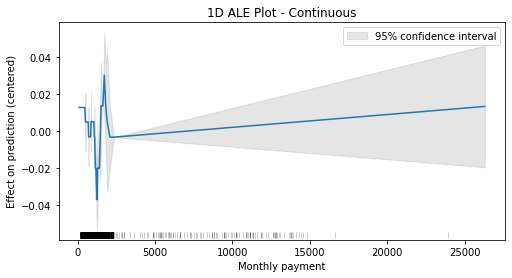

PyALE._ALE_generic:INFO: Discrete feature detected.


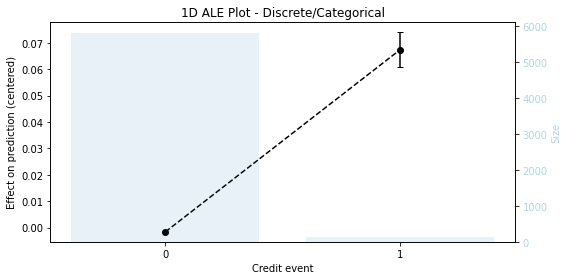

PyALE._ALE_generic:INFO: Discrete feature detected.


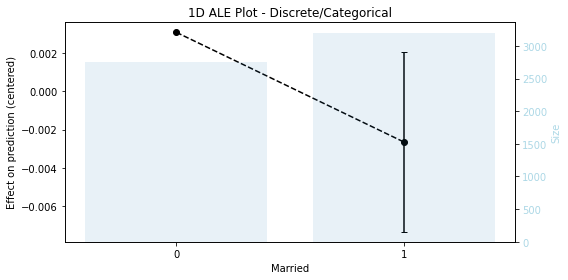

PyALE._ALE_generic:INFO: Discrete feature detected.


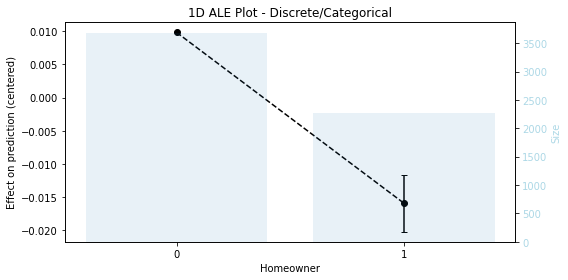

In [62]:
for each_f in X_train.columns:
    ale_eff = ale(
        X=X_train, model=rf_tuned, feature=[each_f], grid_size=50, include_CI=True, C=0.95

    )
    plt.show()

# ICE 

/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


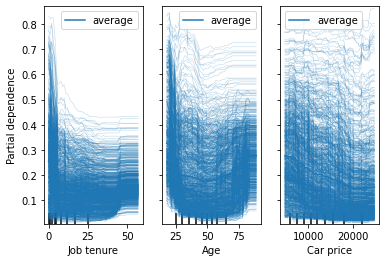

In [72]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [0, 1, 2], kind="both")


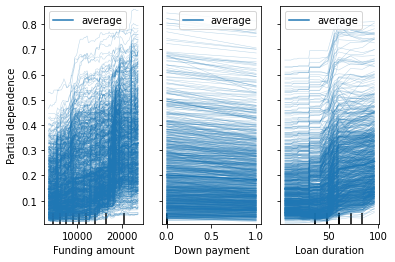

In [73]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [3, 4, 5], kind="both")

/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


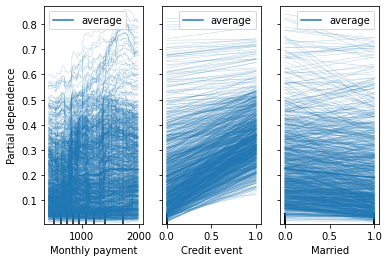

In [75]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [6, 7, 8], kind="both")

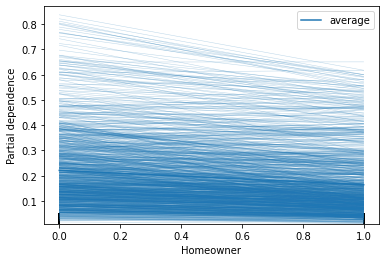

In [74]:
PartialDependenceDisplay.from_estimator(rf_tuned, X_train, [9], kind="both")

# Lime

In [78]:
import lime
import lime.lime_tabular


In [86]:
# explainer = lime.lime_tabular.LimeTabularExplainer(X_t)
def prob(data):
    return np.array(list(zip(1-rf_tuned.predict(data),rf_tuned.predict(data))))
    

In [96]:
features = np.array(X_train)
feature_list = list(X_train.columns)

len(feature_list)


10

In [92]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.astype(int).values,  
mode='classification',feature_names=X_train.columns)

In [101]:
i = 2
exp = explainer.explain_instance(X_train.loc[i,feature_list].astype(int).values, prob, num_features=10)

exp.show_in_notebook(show_table=True)

/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
